<a href="https://colab.research.google.com/github/Oluwaphygo/3MTT/blob/main/Adewole_Toluwallope_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Project Title: Income Level Prediction
# Author: Adewole Toluwalope Olumide
# Description: This project builds a machine learning model to predict whether a person's income exceeds $50K/year based on census data. It involves data exploration, feature engineering, model training, evaluation, and recommendations for deployment and future improvement.


In [1]:
# Importing Libraries

# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Save model
import joblib

# Warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Load the Dataset
from google.colab import files

uploaded = files.upload()


Saving income_data.csv to income_data.csv


In [3]:
df = pd.read_csv("income_data.csv")

In [4]:
# Show top records
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
# Statistical summary
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# Check missing values
df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [8]:
# Drop irrelevant features (example: 'fnlwgt' often isn't helpful)
df.drop(columns=['fnlwgt'], inplace=True)

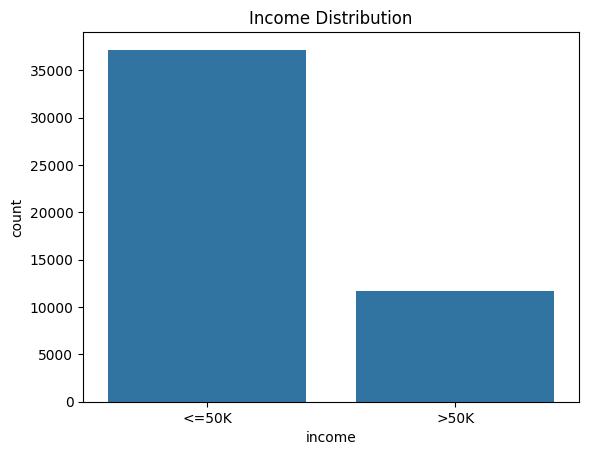

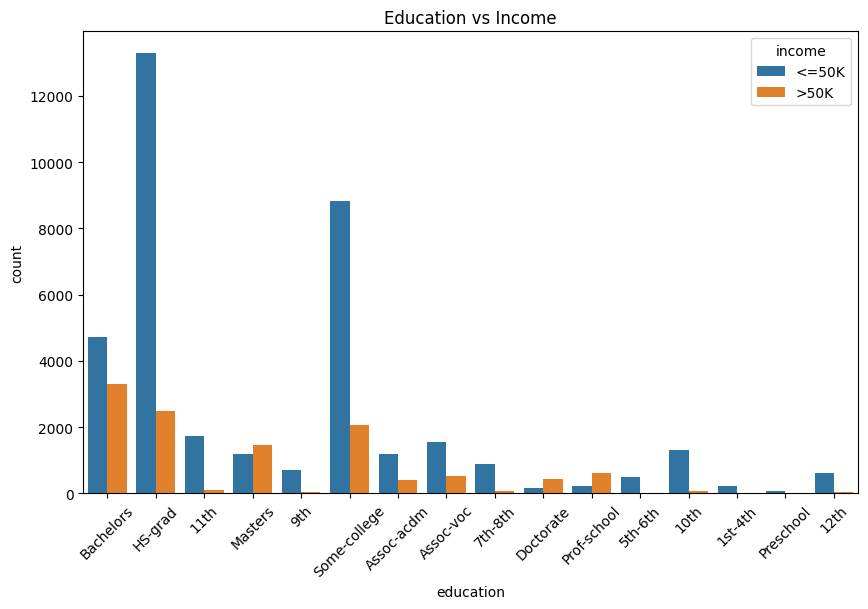

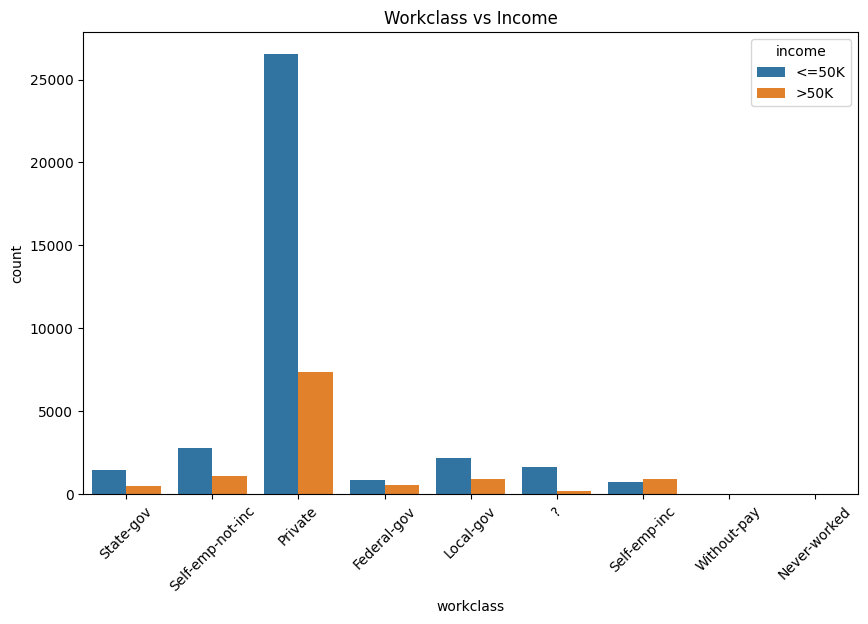

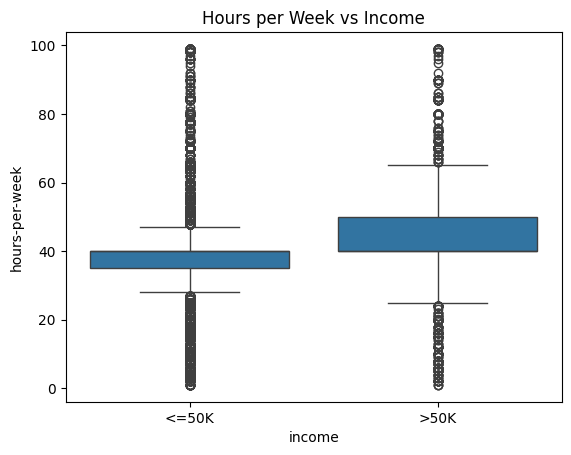

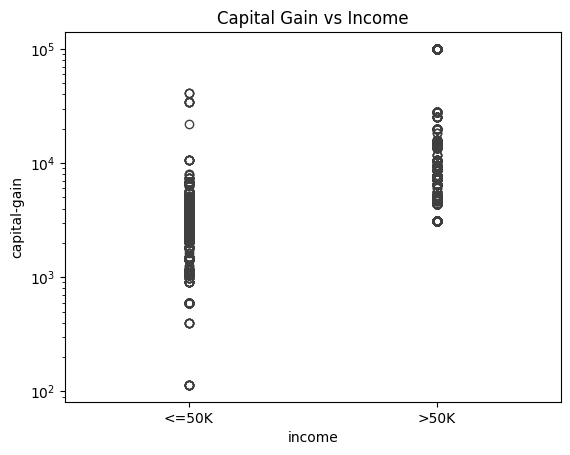

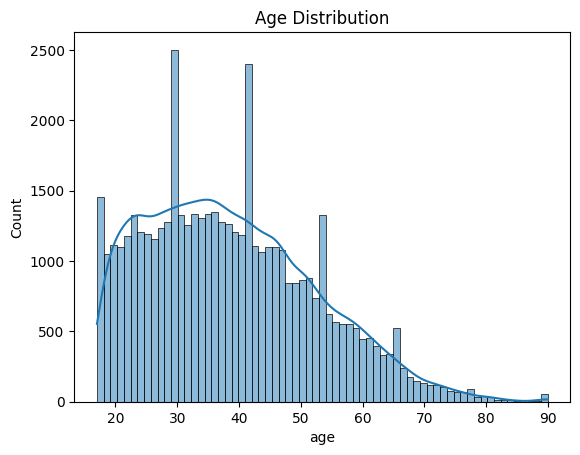

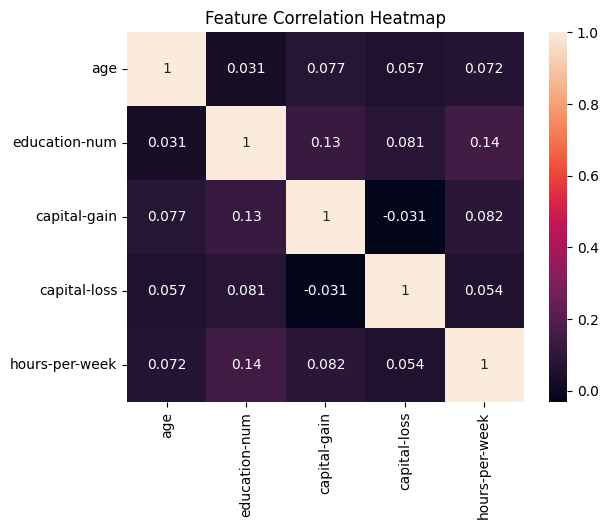

In [10]:
#Exploratory Data Analysis (EDA)
# Target distribution
sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.show()

# Education vs income
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='education', hue='income')
plt.title("Education vs Income")
plt.xticks(rotation=45)
plt.show()

# Workclass vs income
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='workclass', hue='income')
plt.title("Workclass vs Income")
plt.xticks(rotation=45)
plt.show()

# Hours-per-week vs income
sns.boxplot(data=df, x='income', y='hours-per-week')
plt.title('Hours per Week vs Income')
plt.show()

# Capital gain vs income
sns.boxplot(data=df, x='income', y='capital-gain')
plt.yscale('log')
plt.title('Capital Gain vs Income')
plt.show()

# Age distribution
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

# Correlation heatmap (for numerical features)
num_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(num_df.corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()


In [11]:
# Preprocessing & Feature Engineering
# Replace missing values represented as '?' with NaN
df.replace('?', np.nan, inplace=True)

# Handle missing values
df.fillna(method='ffill', inplace=True)

# Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('income', axis=1))
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df['income']


In [13]:
#Model Development & Hyperparameter Tuning
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Trying Logistic Regression, Random Forest, and SVM

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# SVM
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)





--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     11109
           1       0.72      0.44      0.55      3544

    accuracy                           0.82     14653
   macro avg       0.78      0.69      0.72     14653
weighted avg       0.81      0.82      0.81     14653



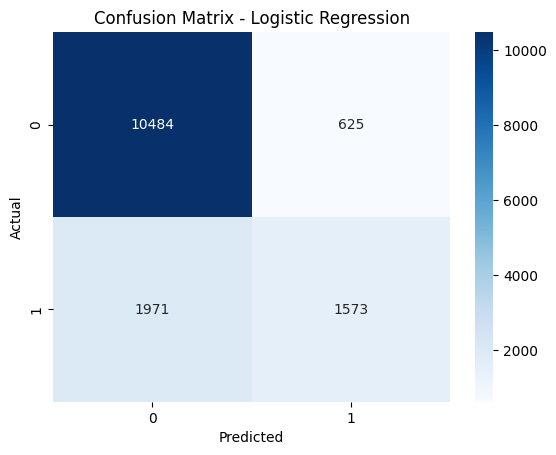

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11109
           1       0.71      0.62      0.66      3544

    accuracy                           0.85     14653
   macro avg       0.80      0.77      0.78     14653
weighted avg       0.84      0.85      0.84     14653



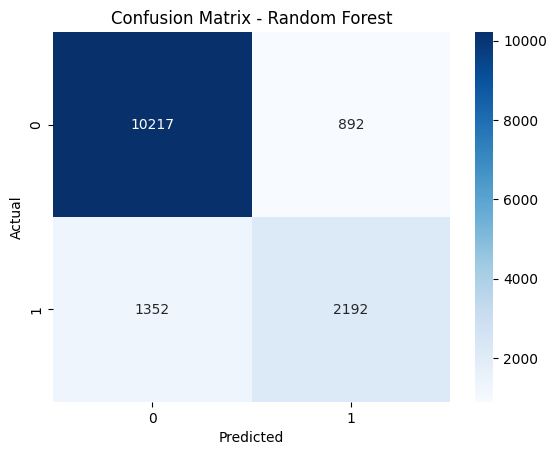

--- SVM ---
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     11109
           1       0.76      0.53      0.63      3544

    accuracy                           0.85     14653
   macro avg       0.81      0.74      0.77     14653
weighted avg       0.84      0.85      0.84     14653



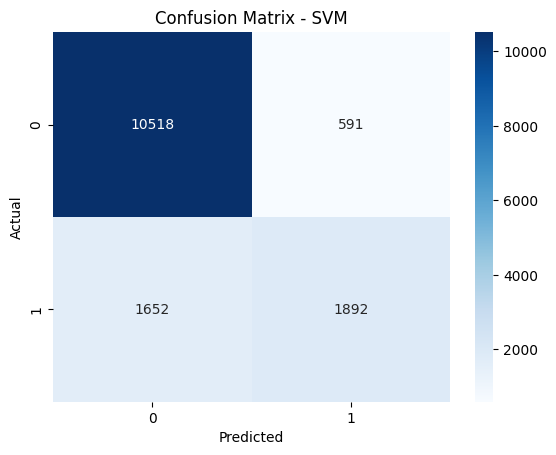

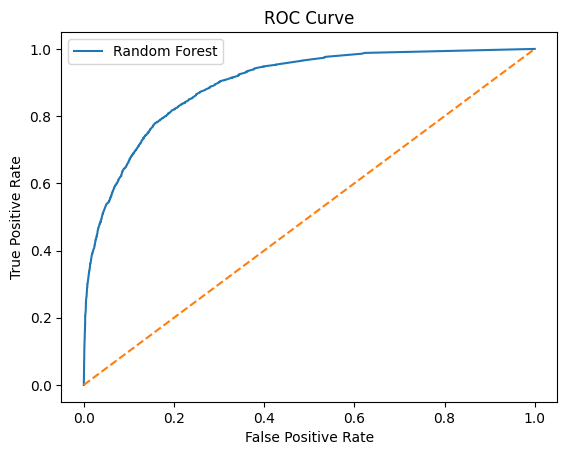

In [14]:
#Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

evaluate_model(y_test, log_pred, "Logistic Regression")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, svm_pred, "SVM")

# ROC Curve
rf_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [15]:
#Save the Best Model

joblib.dump(rf_model, 'income_prediction_model.pkl')



['income_prediction_model.pkl']

In [17]:
#Summary & Recommendations

#Age, education level, hours worked per week, and capital gain are strong indicators of income level.
# - Random Forest performed best among the tested models.
# Recommendations:
# - Further hyperparameter tuning could improve accuracy.
# - Consider using ensemble methods or neural networks for advanced performance